In [1]:
install.packages('car')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Loading required package: carData


,education,income,young,urban
,<int>,<int>,<dbl>,<int>
ME,189,2824,350.7,508
NH,169,3259,345.9,564
VT,230,3072,348.5,322
MA,168,3835,335.3,846
RI,180,3549,327.1,871
CT,193,4256,341.0,774


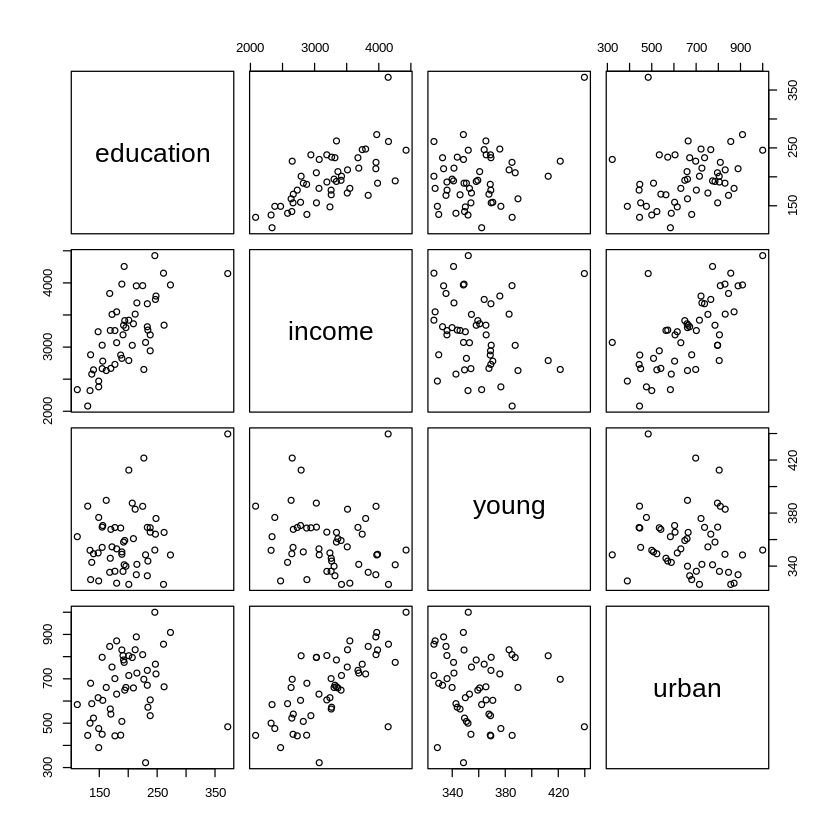

In [2]:
library("car")  # load the 'car' package
data("Anscombe")  # load the data set
?Anscombe  # read a description of the data
head(Anscombe)  # look at the first few lines of the data
pairs(Anscombe)  # scatter plots for each pair of variables

In [3]:
lmod = lm(education ~ income + young + urban, data=Anscombe)
summary(lmod)


Call:
lm(formula = education ~ income + young + urban, data = Anscombe)

Residuals:
    Min      1Q  Median      3Q     Max 
-60.240 -15.738  -1.156  15.883  51.380 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.868e+02  6.492e+01  -4.418 5.82e-05 ***
income       8.065e-02  9.299e-03   8.674 2.56e-11 ***
young        8.173e-01  1.598e-01   5.115 5.69e-06 ***
urban       -1.058e-01  3.428e-02  -3.086  0.00339 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.69 on 47 degrees of freedom
Multiple R-squared:  0.6896,	Adjusted R-squared:  0.6698 
F-statistic: 34.81 on 3 and 47 DF,  p-value: 5.337e-12


In [12]:
library("rjags")

mod_string = " model {
    for (i in 1:length(education)) {
        education[i] ~ dnorm(mu[i], prec)
        mu[i] = b0 + b[1]*income[i] + b[2]*young[i] + b[3]*urban[i]
    }
    
    b0 ~ dnorm(0.0, 1.0/1.0e6)
    for (i in 1:3) {
        b[i] ~ dnorm(0.0, 1.0/1.0e6)
    }
    
    prec ~ dgamma(1.0/2.0, 1.0*1500.0/2.0)
    	## Initial guess of variance based on overall
    	## variance of education variable. Uses low prior
    	## effective sample size. Technically, this is not
    	## a true 'prior', but it is not very informative.
    sig2 = 1.0 / prec
    sig = sqrt(sig2)
} "
params = c("b0", "b", "sig", "sig2")

data_jags = as.list(Anscombe)

In [13]:
mod1 = jags.model(textConnection(mod_string), data=data_jags, n.chains=3)
update(mod1, 1000) # burn-in

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 51
   Unobserved stochastic nodes: 5
   Total graph size: 422

Initializing model



In [14]:
mod1_sim = coda.samples(model=mod1,
                        variable.names=params,
                        n.iter=5000)
mod1_csim = do.call(rbind, mod1_sim) # combine multiple chains

In [15]:
dic.samples(mod1, n.iter=1e5)

Mean deviance:  480.9 
penalty 5.17 
Penalized deviance: 486.1 

In [16]:
mod_string = " model {
    for (i in 1:length(education)) {
        education[i] ~ dnorm(mu[i], prec)
        mu[i] = b0 + b[1]*income[i] + b[2]*young[i]
    }
    
    b0 ~ dnorm(0.0, 1.0/1.0e6)
    for (i in 1:3) {
        b[i] ~ dnorm(0.0, 1.0/1.0e6)
    }
    
    prec ~ dgamma(1.0/2.0, 1.0*1500.0/2.0)
    	## Initial guess of variance based on overall
    	## variance of education variable. Uses low prior
    	## effective sample size. Technically, this is not
    	## a true 'prior', but it is not very informative.
    sig2 = 1.0 / prec
    sig = sqrt(sig2)
} "
params = c("b0", "b", "sig", "sig2")

data_jags = as.list(Anscombe)

In [17]:
mod2 = jags.model(textConnection(mod_string), data=data_jags, n.chains=3)
update(mod2, 1000) # burn-in

Warning message in jags.model(textConnection(mod_string), data = data_jags, n.chains = 3):
“Unused variable "urban" in data”

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 51
   Unobserved stochastic nodes: 5
   Total graph size: 321

Initializing model



In [18]:
dic.samples(mod2, n.iter=1e5)

Mean deviance:  489.1 
penalty 4.117 
Penalized deviance: 493.2 

In [19]:
mod_string = " model {
    for (i in 1:length(education)) {
        education[i] ~ dnorm(mu[i], prec)
        mu[i] = b0 + b[1]*income[i] + b[2]*young[i] + b[3] * income[i] * young[i]
    }
    
    b0 ~ dnorm(0.0, 1.0/1.0e6)
    for (i in 1:3) {
        b[i] ~ dnorm(0.0, 1.0/1.0e6)
    }
    
    prec ~ dgamma(1.0/2.0, 1.0*1500.0/2.0)
    	## Initial guess of variance based on overall
    	## variance of education variable. Uses low prior
    	## effective sample size. Technically, this is not
    	## a true 'prior', but it is not very informative.
    sig2 = 1.0 / prec
    sig = sqrt(sig2)
} "
params = c("b0", "b", "sig", "sig2")

data_jags = as.list(Anscombe)

In [20]:
mod3 = jags.model(textConnection(mod_string), data=data_jags, n.chains=3)
update(mod3, 1000) # burn-in

Warning message in jags.model(textConnection(mod_string), data = data_jags, n.chains = 3):
“Unused variable "urban" in data”

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 51
   Unobserved stochastic nodes: 5
   Total graph size: 372

Initializing model



In [21]:
dic.samples(mod3, n.iter=1e5)

Mean deviance:  487.3 
penalty 4.81 
Penalized deviance: 492.1 

In [24]:
mod1_sim = coda.samples(model=mod1,
             variable.names=params,
             n.iter=5000)

In [29]:
m = as.matrix(mod1_sim)

In [37]:
mean(m[,c(1)] > 0)

[1] 1

In [39]:
summary(mod1_sim)


Iterations = 111001:116000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

           Mean        SD  Naive SE Time-series SE
b[1]    0.08079   0.01016 8.296e-05      9.965e-04
b[2]    0.82900   0.17435 1.424e-03      2.868e-02
b[3]   -0.10521   0.03791 3.095e-04      2.935e-03
b0   -291.87524  70.51237 5.757e-01      1.269e+01
sig    27.51506   2.86503 2.339e-02      5.045e-02
sig2  765.28624 162.19228 1.324e+00      2.884e+00

2. Quantiles for each variable:

           2.5%        25%        50%        75%      97.5%
b[1]    0.05865    0.07457    0.08114    0.08769    0.09975
b[2]    0.44978    0.71099    0.83411    0.95400    1.13006
b[3]   -0.17811   -0.13087   -0.10577   -0.08040   -0.02831
b0   -415.51906 -343.27660 -294.47981 -244.69456 -134.73126
sig    22.61427   25.46670   27.27000   29.30314   33.74495
sig2  511.40522  648.55285  743.65315  858.67410